Chapter 6
# 可视化色谱在RGB色彩空间位置
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [4]:
# 导入包
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

### 1. 了解 RdYlBu 的具体颜色

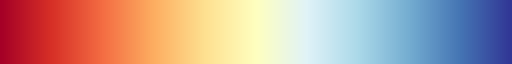

In [5]:
mpl.colormaps['RdYlBu'] 

In [40]:
# 如果大家对某个色谱中的具体色号感兴趣的话，可以用如下办法查看
import matplotlib as mpl
RdYlBu = mpl.colormaps['RdYlBu'] 
# 请大家自己分析 rainbow 和其他色谱的颜色特点

color_codes = RdYlBu(np.linspace(0, 1, 100))
# 将色谱分为 100 份
print(color_codes)
# 打印每个颜色 RGBA值

[[0.64705882 0.         0.14901961 1.        ]
 [0.66243752 0.01476355 0.14932718 1.        ]
 [0.68550557 0.03690888 0.14978854 1.        ]
 [0.70088428 0.05167243 0.15009612 1.        ]
 [0.72395233 0.07381776 0.15055748 1.        ]
 [0.73933103 0.08858131 0.15086505 1.        ]
 [0.76239908 0.11072664 0.15132641 1.        ]
 [0.78546713 0.13287197 0.15178777 1.        ]
 [0.80084583 0.14763552 0.15209535 1.        ]
 [0.82391388 0.16978085 0.15255671 1.        ]
 [0.83929258 0.18454441 0.15286428 1.        ]
 [0.85428681 0.21168781 0.16370627 1.        ]
 [0.86766628 0.23983083 0.17662438 1.        ]
 [0.87658593 0.25859285 0.18523645 1.        ]
 [0.8899654  0.28673587 0.19815456 1.        ]
 [0.89888504 0.30549789 0.20676663 1.        ]
 [0.91226451 0.33364091 0.21968474 1.        ]
 [0.92118416 0.35240292 0.22829681 1.        ]
 [0.93456363 0.38054594 0.24121492 1.        ]
 [0.9479431  0.40868897 0.25413303 1.        ]
 [0.95686275 0.42745098 0.2627451  1.        ]
 [0.96101499 

### 2. 色谱在RGB空间中的位置

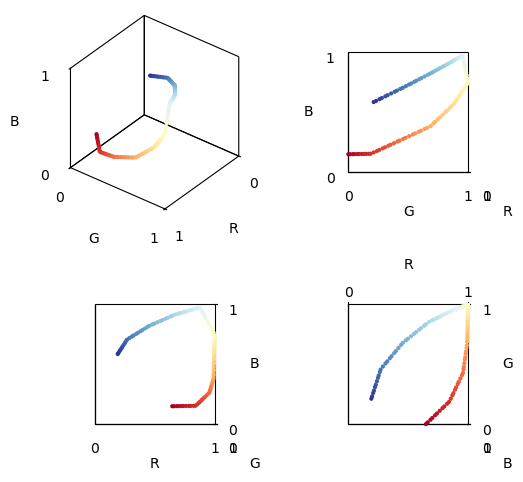

In [41]:
# color_codes 前三列无非就是三维直角坐标系中 100 个散点坐标点
# 我们可以用三维散点可视化 RdYlBu 色谱在 RGB 空间位置

fig = plt.figure(figsize = (6,6))

azim_array = [38, 0, -90, -90]
elev_array = [34, 0, 0,  90]
# 指定三种不同观察三维空间的视角

for idx, angles in enumerate(zip(azim_array, elev_array)):
    
    ax = fig.add_subplot(2,2,idx+1, projection = '3d')
    # 2 X 2 子图布置方案
    # 每个子图展示一个视角
    
    # 绘制三维散点
    ax.scatter(color_codes[:,0],  # 色谱颜色的R值 (x坐标）
               color_codes[:,1],  # 色谱颜色的G值 (y坐标）
               color_codes[:,2],  # 色谱颜色的B值 (z坐标） 
               c = color_codes,   # 指定每个点的RGB色号
               s = 4,             # 散点大小
               alpha = 1)         # 透明度


    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_zlim(0,1)
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_zticks([0, 1])
    ax.set_xlabel('R')
    ax.set_ylabel('G')
    ax.set_zlabel('B')
    
    # 白色图脊
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

    # 白色背板
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # 格子颜色为黑色
    plt.rcParams['grid.color'] = "k"
    
    # 正交投影
    ax.set_proj_type('ortho')
    
    # 等比例尺
    ax.set_box_aspect(aspect = (1,1,1))
    
    # 采用指定视角
    ax.view_init(azim=angles[0], elev=angles[1])
    
fig.savefig('Figures/RdYlBu色谱的色号在RGB空间的位置.svg', format='svg')


### 3. 创建自定义函数

In [62]:
# 根据之前分析，构造一个可视化函数
# 函数输入为matplotlib中一个色谱的名称
# 函数可视化该色谱在RGB空间的具体位置
# 请大家自己补充注释

def visualize_cm_in_RGB(cm_name_str):
    
    cm_name = mpl.colormaps[cm_name_str] 

    color_codes = cm_name(np.linspace(0, 1, 200))

    fig = plt.figure(figsize = (6,6))

    azim_array = [38, 0, -90, -90]
    elev_array = [34, 0, 0,  90]

    for idx, angles in enumerate(zip(azim_array, elev_array)):

        ax = fig.add_subplot(2,2,idx+1, projection = '3d')

        ax.scatter(color_codes[:,0], 
                   color_codes[:,1], 
                   color_codes[:,2], 
                   c = color_codes, 
                   s = 4,
                   alpha = 1)

        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        ax.set_zlim(0,1)
        ax.set_xticks([0, 1])
        ax.set_yticks([0, 1])
        ax.set_zticks([0, 1])
        ax.set_xlabel('R')
        ax.set_ylabel('G')
        ax.set_zlabel('B')

        # Transparent spines
        # ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
        # ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
        # ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

        # Transparent panes
        # ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        # ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        # ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


        # ax.grid()
        plt.rcParams['grid.color'] = "k"
        ax.set_proj_type('ortho')
        ax.set_box_aspect(aspect = (1,1,1))
        ax.view_init(azim=angles[0], elev=angles[1])

    fig.savefig('Figures/' + cm_name_str + '色谱的色号位置.svg', format='svg')
    # 注意，越靠近1，颜色越饱满，明亮
    

### 4. 可视化几个常用色谱

In [45]:
cm_list = ['RdYlBu', 'viridis', 'Blues', 'cool', 'rainbow', 'jet', 'turbo', 'hsv']

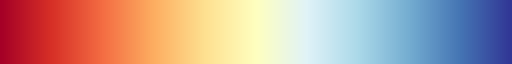

In [68]:
mpl.colormaps['RdYlBu'] 

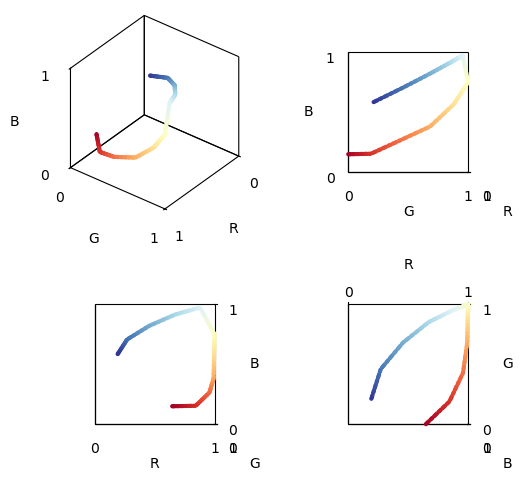

In [45]:
visualize_cm_in_RGB('RdYlBu')

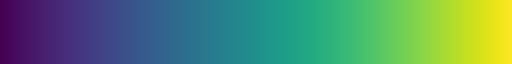

In [69]:
mpl.colormaps['viridis'] 

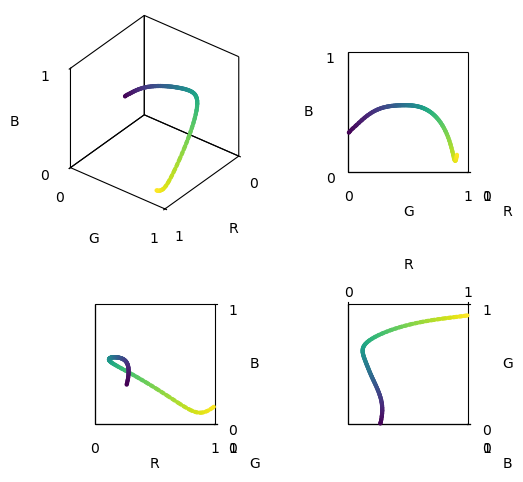

In [46]:
visualize_cm_in_RGB('viridis')

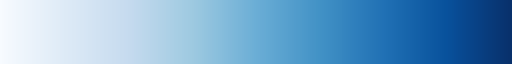

In [70]:
mpl.colormaps['Blues'] 

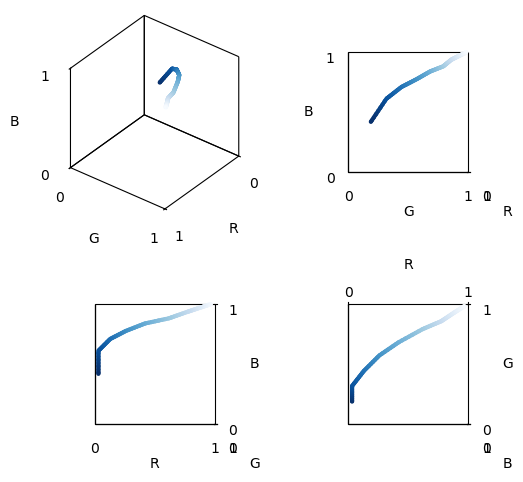

In [53]:
visualize_cm_in_RGB('Blues')

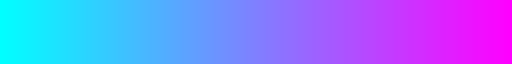

In [71]:
mpl.colormaps['cool'] 

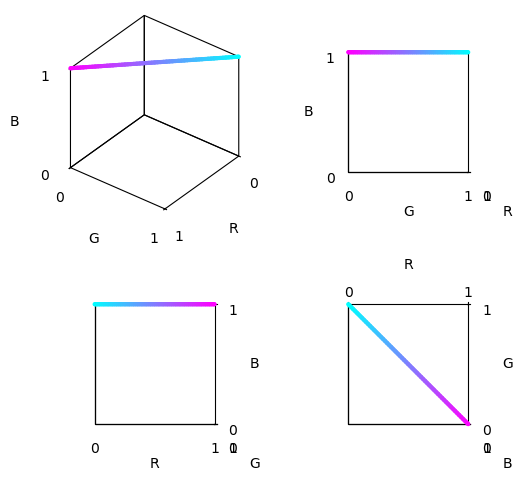

In [54]:
visualize_cm_in_RGB('cool')

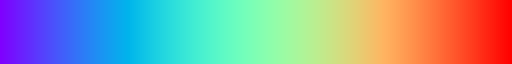

In [72]:
mpl.colormaps['rainbow'] 

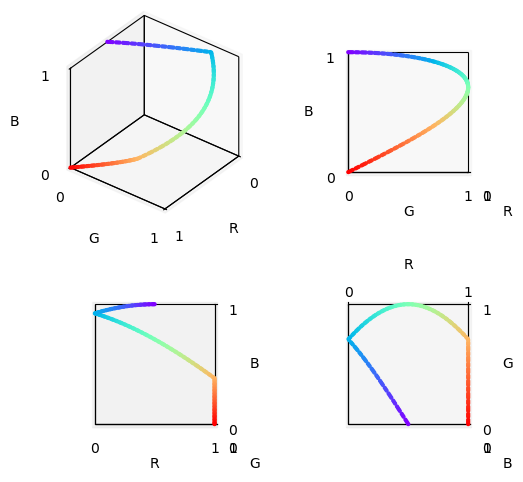

In [63]:
visualize_cm_in_RGB('rainbow')

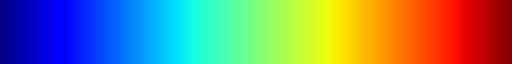

In [73]:
mpl.colormaps['jet'] 

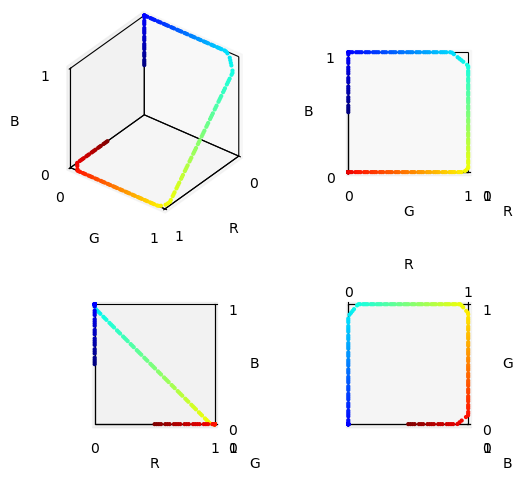

In [64]:
visualize_cm_in_RGB('jet')

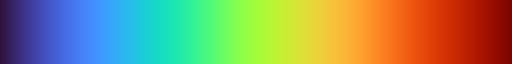

In [74]:
mpl.colormaps['turbo'] 

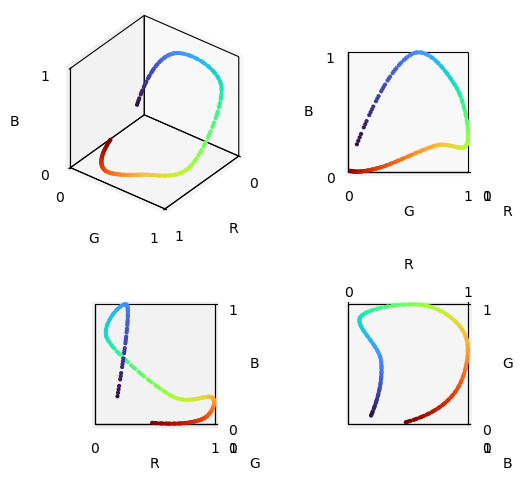

In [65]:
visualize_cm_in_RGB('turbo')

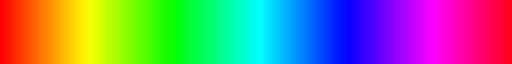

In [75]:
mpl.colormaps['hsv'] 

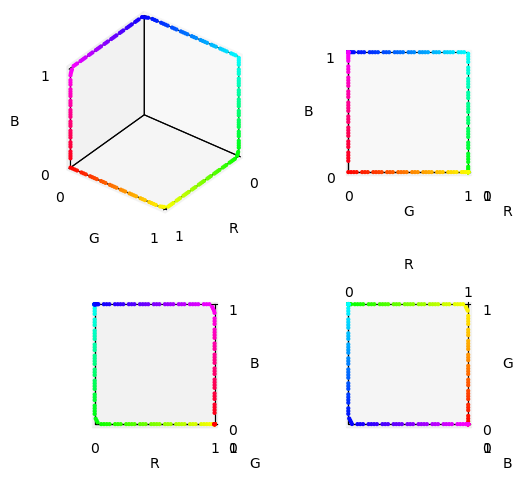

In [66]:
visualize_cm_in_RGB('hsv')
# 大小写敏感 case-sensitive，不能写成HSV、Hsv

In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023